#### Data Creation

In [1]:
## pd.Series(): Create a Series from an array, list, or dictionary.

import pandas as pd
s = pd.Series([1, 3, 5, None, 6])
print(s)


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
dtype: float64


In [2]:
## pd.DataFrame(): Create a DataFrame from structured data like dictionaries or NumPy arrays.

df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
print(df)


   A  B
0  1  3
1  2  4


In [3]:
## pd.date_range(): Create a range of dates.

dates = pd.date_range("2023-01-01", periods=5)
print(dates)


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05'],
              dtype='datetime64[ns]', freq='D')


#### Viewing Data

In [4]:
## head() / tail(): View the first or last n rows of a DataFrame.

print(df.head(2))
print(df.tail(1))


   A  B
0  1  3
1  2  4
   A  B
1  2  4


In [5]:
## index / columns: Access the index and column labels.

print(df.index)
print(df.columns)


RangeIndex(start=0, stop=2, step=1)
Index(['A', 'B'], dtype='object')


In [6]:
## to_numpy(): Convert the DataFrame to a NumPy array.

print(df.to_numpy())

[[1 3]
 [2 4]]


#### Descriptive Statistics

In [7]:
## describe(): Get a statistical summary of numerical columns.

print(df.describe())

              A         B
count  2.000000  2.000000
mean   1.500000  3.500000
std    0.707107  0.707107
min    1.000000  3.000000
25%    1.250000  3.250000
50%    1.500000  3.500000
75%    1.750000  3.750000
max    2.000000  4.000000


In [8]:
## mean() / sum(): Perform aggregation on numerical columns.

print(df.mean())
print(df.sum())

A    1.5
B    3.5
dtype: float64
A    3
B    7
dtype: int64


#### Selection and Indexing

In [9]:
## loc[] / iloc[]: Access data by label or integer position.

print(df.loc[0, 'A'])
print(df.iloc[0, 0])


1
1


In [10]:
## at[] / iat[]: Fast access to a single value.
print(df.at[0, 'A'])
print(df.iat[0, 0])


1
1


In [11]:
## query(): Query the DataFrame using string expressions.
filtered = df.query("A > 1")
print(filtered)


   A  B
1  2  4


In [12]:
## isin(): Filter rows based on membership.

print(df[df['A'].isin([1, 2])])


   A  B
0  1  3
1  2  4


#### Handling Missing Data

In [13]:
## dropna() / fillna(): Drop or fill missing values.

df.dropna(inplace=True)
df.fillna(0, inplace=True)


In [14]:
## isna(): Identify missing values.

print(df.isna())


       A      B
0  False  False
1  False  False


#### Data Manipulation

In [15]:
## sort_values(): Sort rows by a column.

df_sorted = df.sort_values(by='A')
print(df_sorted)


   A  B
0  1  3
1  2  4


In [16]:
## apply(): Apply a function to each column or row.

df['C'] = df['A'].apply(lambda x: x**2)
print(df)


   A  B  C
0  1  3  1
1  2  4  4


In [17]:
## groupby(): Group data for aggregation.

grouped = df.groupby('A').sum()
print(grouped)


   B  C
A      
1  3  1
2  4  4


#### Reshaping and Pivoting

In [18]:
## pivot() / pivot_table(): Reshape data based on column values.
pivoted = df.pivot(index='A', columns='B', values='C')
print(pivoted)


B    3    4
A          
1  1.0  NaN
2  NaN  4.0


In [19]:
## melt(): Transform wide data to long format.
melted = df.melt(id_vars='A', value_vars=['B', 'C'])
print(melted)


   A variable  value
0  1        B      3
1  2        B      4
2  1        C      1
3  2        C      4


In [20]:
## stack() / unstack(): Stack or unstack a DataFrame.
stacked = df.stack()
unstacked = stacked.unstack()


#### Time Series

In [21]:
## resample(): Aggregate data based on a new frequency.

ts = pd.Series(range(6), index=pd.date_range("2023-01-01", periods=6))
resampled = ts.resample('2D').sum()
print(resampled)


2023-01-01    1
2023-01-03    5
2023-01-05    9
Freq: 2D, dtype: int64


In [22]:
## tz_localize() / tz_convert(): Manage time zones.

ts = ts.tz_localize('UTC').tz_convert('US/Eastern')
print(ts)


2022-12-31 19:00:00-05:00    0
2023-01-01 19:00:00-05:00    1
2023-01-02 19:00:00-05:00    2
2023-01-03 19:00:00-05:00    3
2023-01-04 19:00:00-05:00    4
2023-01-05 19:00:00-05:00    5
Freq: D, dtype: int64


#### Visualization

<Axes: >

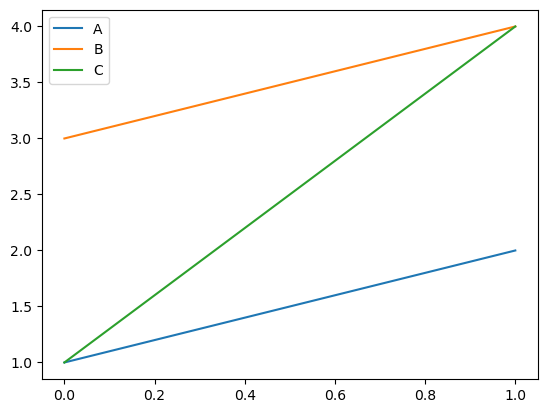

In [23]:
## plot(): Create basic visualizations.

df.plot(kind='line')
